### EDA - Exploratory Data Analysis

#### Para analise EDA foi usado dados de reclamações feitas por consumidores consolidado até o mês de outubro no site https://www.consumidor.gov.br/pages/dadosabertos/externo/

### Importando bibliotecas

In [1]:
# manipulação dos dados
import numpy as np
import pandas as pd

# visualização dos dados
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# ignorar mensagens de warnings
import warnings
warnings.filterwarnings("ignore")

### Lendo o arquivo .csv

In [2]:
df = pd.read_csv('arquivos/finalizadas_2021_10.csv', sep=';')

In [3]:
df.head() #Visualizando o cabecalho dos arquivos

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,NE,PI,Teresina,F,entre 21 a 30 anos,2021-10-01,NaN,BRB - Banco de Brasília,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Não comprei / contratei,N,N,Finalizada não avaliada,Não Avaliada,NaN
1,S,RS,São Borja,F,entre 61 a 70 anos,2021-10-01,NaN,Facta Financeira,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Telefone,S,N,Finalizada não avaliada,Não Avaliada,NaN
2,S,RS,Sapiranga,M,entre 61 a 70 anos,2021-10-01,NaN,Facta Financeira,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,NaN
3,S,RS,Porto Alegre,M,entre 21 a 30 anos,2021-10-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
4,NE,PE,Carpina,M,entre 21 a 30 anos,2021-10-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN


In [4]:
df.info() #Verificando o tipo de cada Coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120708 entries, 0 to 120707
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Região                  120708 non-null  object 
 1   UF                      120708 non-null  object 
 2   Cidade                  120708 non-null  object 
 3   Sexo                    120703 non-null  object 
 4   Faixa Etária            120708 non-null  object 
 5   Data Finalização        120708 non-null  object 
 6   Tempo Resposta          119068 non-null  float64
 7   Nome Fantasia           120708 non-null  object 
 8   Segmento de Mercado     120708 non-null  object 
 9   Área                    120708 non-null  object 
 10  Assunto                 120708 non-null  object 
 11  Grupo Problema          120708 non-null  object 
 12  Problema                120708 non-null  object 
 13  Como Comprou Contratou  120708 non-null  object 
 14  Procurou Empresa    

**Analise**: *Verificado um total de 19 colunas, 2 do tipo "float64" e 17 do tipo "object".* 

In [5]:
df.isnull().sum() #Verificando as colunas que possuem dados faltantes e sua quantidade

Região                        0
UF                            0
Cidade                        0
Sexo                          5
Faixa Etária                  0
Data Finalização              0
Tempo Resposta             1640
Nome Fantasia                 0
Segmento de Mercado           0
Área                          0
Assunto                       0
Grupo Problema                0
Problema                      0
Como Comprou Contratou        0
Procurou Empresa              0
Respondida                    0
Situação                      0
Avaliação Reclamação          0
Nota do Consumidor        61853
dtype: int64

**Analise**: *Verificado dados faltantes na coluna Sexo, Tempo de Resposta e Nota do Consumidor.* 

### Quais perguntas queremos responder com esta análise?

##### 1. Reclamações por sexo
##### 2. Quais os problemas mais comuns
##### 3. Segmentos mais afetados
##### 4. Empresas com mais reclamações


### Análise Exploratória:

#### 1. Reclamações por sexo

In [15]:
df['Sexo'].value_counts(dropna=False, normalize=True)

M      0.543684
F      0.455811
O      0.000464
NaN    0.000041
Name: Sexo, dtype: float64

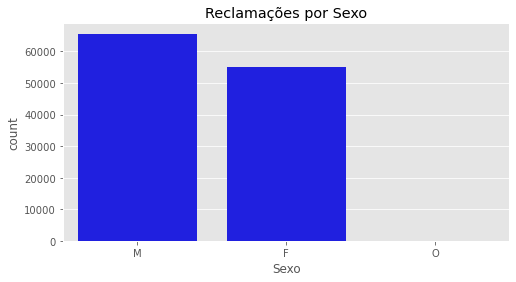

In [8]:
# criando a área de plotagem
plt.figure(figsize=(8,4))

# ordem das categorias
order = df['Sexo'].value_counts().index

# criando o gráfico
ax = sns.countplot(x='Sexo', data=df, color='b', order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_title('Reclamações por Sexo');

**Analise**: *é possivel observar pelo gráfico que o maior numero de reclamações é feita por homens*

### 2. Quais os problemas mais comuns

In [16]:
df['Grupo Problema'].value_counts()

Cobrança / Contestação          52275
Contrato / Oferta               23292
Atendimento / SAC               19727
Vício de Qualidade              14586
Entrega do Produto               4267
Dados Pessoais e Privacidade     3995
Informação                       1946
Saúde e Segurança                 620
Name: Grupo Problema, dtype: int64

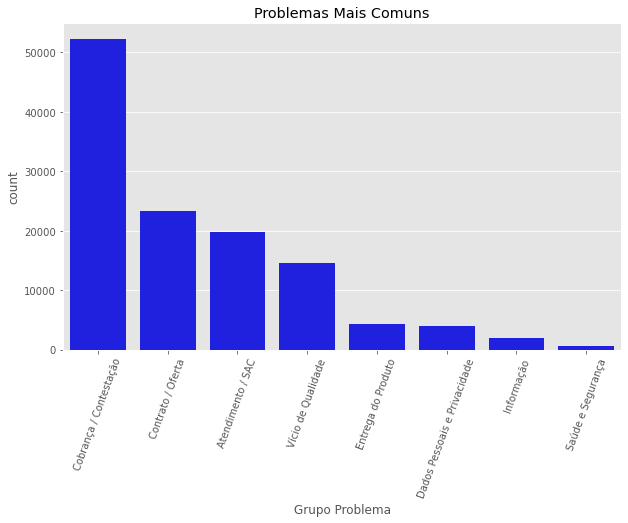

In [10]:
# criando a área de plotagem
plt.figure(figsize=(10,6))

# ordem das categorias
order = df['Grupo Problema'].value_counts().index

# criando o gráfico
ax = sns.countplot(x='Grupo Problema', data=df, color='b', order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
ax.set_title('Problemas Mais Comuns');

**Analise**: *é possivel observar que as pirncipais reclamações estão na categoria "Cobrança/Contestação", abaixo um detalhamento dos principais "Problemas" dentro de "Cobrança/Contestação"*

In [11]:
df[df['Grupo Problema'] == 'Cobrança / Contestação']['Problema'].value_counts()

Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            11166
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores                       8966
Cobrança indevida / abusiva para alterar ou cancelar o contrato                                            8401
Cobrança de tarifas, taxas, valores não previstos / não informados                                         4506
Cobrança após cancelamento do serviço                                                                      2211
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                       2179
Renegociação / parcelamento de dívida                                                                      2132
Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)                           1841
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                       

**Analise**: *é possivel observar no grupo "Cobrança/Contestação" as principais reclamações são cobrança por serviço/produto não contratado/não reconhecido/não solicitado.*

### 3. Segmentos mais afetados

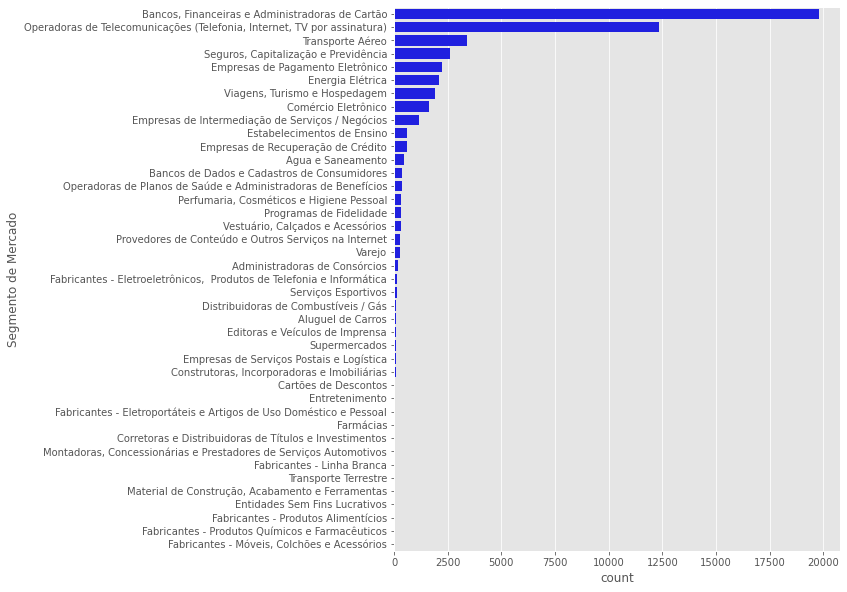

In [17]:
# filtrando pelo maior grupo de Problemas
maiorProblema = df[df['Grupo Problema'] == 'Cobrança / Contestação']

# Contando pelo segmento
x = maiorProblema['Segmento de Mercado'].value_counts()

# criando um gráfico de barras horizontais
# definindo o tamanho da área de plotagem
plt.figure(figsize=(8,10))

# ordenando as categorias
order = maiorProblema['Segmento de Mercado'].value_counts().index

# criando o plot
sns.countplot(y='Segmento de Mercado', data=maiorProblema, color='b', order=order);

**Analise**: *Verificado que os segmentos mais afetados são Bancos, Financeiras e Adminstradoras de Cartão.*

### 4. Empresas com mais reclamações

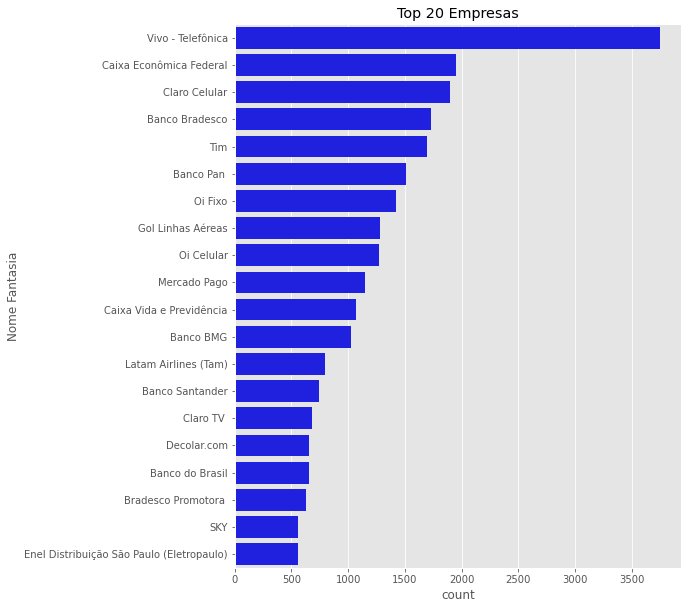

In [14]:
# criando um gráfico de barras horizontais
# definindo o tamanho da área de plotagem
plt.figure(figsize=(8,10))

# ordenando as categorias
order=maiorProblema['Nome Fantasia'].value_counts()[:20].index

# criando o plot
sns.countplot(y='Nome Fantasia', data=maiorProblema, order=order, color='b')
plt.title('Top 20 Empresas');

**Analise**: *Verificado que apesar do setor de bancos ser o segmento com mais reclamações, o top 3 de empresas mais reclamadas tem 1º Vivo, 2º Caixa Ecomomica e 3º Claro.*

### 4. Conclusão:

Apos a realização da EDA foi possível observar que as mulheres reclamam um pouco mais que os homens, as principais reclamações dos consumidores em geral é devido cobranças indevidas, produtos não contratados e/ou não solicitados.

O Setor com mais reclamações é bancos, financeiras e administradoras de cartão seguido pelo setor de operadoras de telecomunicações.

A empresa com mais reclamações é do setor de operadoras de telecomunicações, a Vivo Telefônica.